In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

training_data = pd.read_csv('../../data/numerai_training_data.csv', index_col='id')
# sampling
sampling_data = training_data.copy().sample(frac=0.3, random_state=1)
feature_names = [f for f in training_data.columns if "feature" in f]
X = sampling_data[feature_names]
y = sampling_data["target"]
X.isna().sum().sum(), y.isna().sum().sum()

(0, 0)

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit([0, 0.25, 0.5, 0.75, 1])
X = X.copy()
y = y.copy()
y = label_encoder.transform(y)
for col in X.columns:
    X[col] = label_encoder.transform(X[col])
X.describe()

,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,...,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46
count,150542.000000,150542.000000,150542.000000,150542.000000,150542.000000,150542.000000,150542.000000,150542.000000,150542.000000,150542.000000,...,150542.000000,150542.000000,150542.000000,150542.000000,150542.000000,150542.000000,150542.000000,150542.000000,150542.000000,150542.000000
mean,2.003992,2.003301,2.002604,2.001754,1.999920,2.000970,2.000897,2.002704,1.997994,1.998240,...,1.998652,1.997323,1.997675,2.002066,2.002385,1.998897,2.002816,1.999542,2.003786,2.002179
std,1.415548,1.415386,1.415155,1.417726,1.413551,1.415354,1.416876,1.417929,1.407205,1.407595,...,1.412693,1.412916,1.413747,1.402820,1.402881,1.407914,1.412519,1.402898,1.390353,1.412967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [50]:
feature_groups = {
    g: [c for c in feature_names if c.startswith(f"feature_{g}")]
    for g in ["intelligence", "wisdom", "charisma", "dexterity", "strength", "constitution"]
}
group_names = list(feature_groups.keys())
for i in group_names:
    print(i, len(feature_groups[i]))

intelligence 12
wisdom 46
charisma 86
dexterity 14
strength 38
constitution 114


In [106]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC, AdaBoostClassifier as ABC, ExtraTreesClassifier as ETC, GradientBoostingClassifier as GBC
from sklearn.feature_selection import SelectFromModel

models = {
    "DecisionTreeC": DTC(max_depth=15, random_state=1, max_leaf_nodes=50),
    "RandomForestC": RFC(n_estimators=100, max_depth=15, random_state=1),
    "AdaBoostC": ABC(n_estimators=100, random_state=1),
    "ExtraTreesC": ETC(n_estimators=100, max_depth=15, random_state=1),
    "GradientBoostingC": GBC(n_estimators=50, max_depth=15, random_state=1)
}

for key in group_names:
    print('*'*50, key, '*'*50)
    features = feature_groups[key]
    feature_counts = dict.fromkeys(features, 0)
    for model_name in models.keys():
        print('-'*30, model_name, '-'*30)
        m = models[model_name].fit(X[features], y)
        f_names = np.array(features)
        selector = SelectFromModel(estimator=m, prefit=True)
        selected_features = f_names[selector.get_support()]
        for f in selected_features:
            feature_counts[f] += 1
    print(feature_counts)
    df = pd.DataFrame({"COUNT": feature_counts.values()}, index=feature_counts.keys())
    df.to_csv(f'./model_based_selection/{key}.csv')

************************************************** intelligence **************************************************
------------------------------ DecisionTreeC ------------------------------
------------------------------ RandomForestC ------------------------------
------------------------------ AdaBoostC ------------------------------
------------------------------ ExtraTreesC ------------------------------
------------------------------ GradientBoostingC ------------------------------
{'feature_intelligence1': 3, 'feature_intelligence2': 1, 'feature_intelligence3': 1, 'feature_intelligence4': 2, 'feature_intelligence5': 2, 'feature_intelligence6': 2, 'feature_intelligence7': 2, 'feature_intelligence8': 4, 'feature_intelligence9': 1, 'feature_intelligence10': 1, 'feature_intelligence11': 3, 'feature_intelligence12': 2}
************************************************** wisdom **************************************************
------------------------------ DecisionTreeC -------------

------------------------------ intelligence ------------------------------
['feature_intelligence8']
------------------------------ wisdom ------------------------------
['feature_wisdom14', 'feature_wisdom13', 'feature_wisdom37', 'feature_wisdom8', 'feature_wisdom32']
------------------------------ charisma ------------------------------
['feature_charisma85', 'feature_charisma36', 'feature_charisma44', 'feature_charisma83', 'feature_charisma32', 'feature_charisma34', 'feature_charisma7', 'feature_charisma74', 'feature_charisma58', 'feature_charisma57']
------------------------------ dexterity ------------------------------
['feature_dexterity11']
------------------------------ strength ------------------------------
['feature_strength10', 'feature_strength31']
------------------------------ constitution ------------------------------
['feature_constitution2', 'feature_constitution31', 'feature_constitution104', 'feature_constitution63']


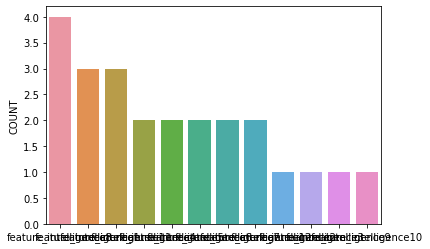

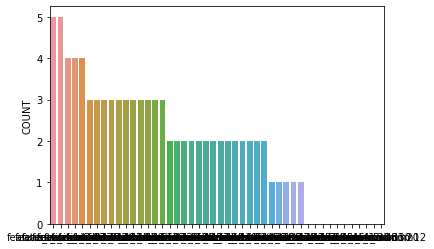

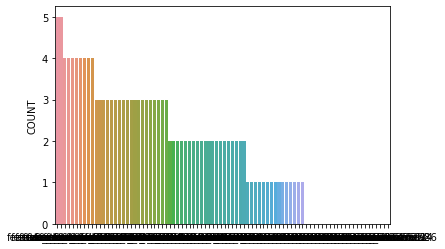

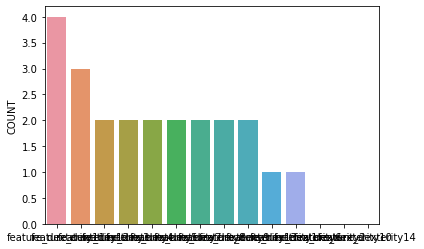

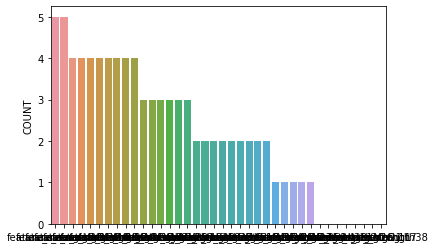

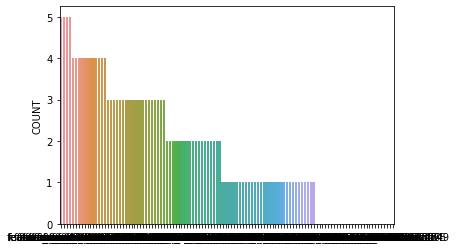

In [108]:
count = 0
list_item =[]
for key in group_names:
    print('-'*30, key, '-'*30)
    df = pd.read_csv(f'./model_based_selection/{key}.csv', index_col=0)
    df = df.sort_values(by="COUNT", ascending=False)
    if key in ["strength", "constitution"]:
        threshold = 5
    else:
        threshold = 4
    print(df.loc[df["COUNT"] >= threshold].index.tolist())
    plt.figure(count)
    sns.barplot(data=df, x=df.index, y="COUNT")
    count += 1
    list_item += df.loc[df["COUNT"] >= threshold].index.tolist()
df = pd.DataFrame({'feature_name': list_item})
df.to_csv('./model_based_selection/selected.csv')

In [2]:
X.describe()

NameError: name 'X' is not defined

In [41]:
from sklearn.feature_selection import SelectFromModel
from time import time

threshold = np.sort(importance)[-5]
tic = time()
sfm = SelectFromModel(lasso, threshold).fit(X[feature_groups[group_names[0]]], y)
toc = time()
print(sfm.get_support(), threshold)
print("Features selected by SelectFromModel: ",
     f"{f_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")

/home/akira/anaconda3/envs/numerai-dev/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass threshold=0.00203305958285722 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[ True  True False  True False False  True False False  True False False] 0.00203305958285722
Features selected by SelectFromModel:  ['feature_intelligence1' 'feature_intelligence2' 'feature_intelligence4'
 'feature_intelligence7' 'feature_intelligence10']
Done in 0.713s


In [48]:
print(importance)

[0.00217797 0.00516234 0.00017995 0.00260114 0.         0.
 0.00203306 0.         0.         0.00467902 0.00025039 0.        ]


In [47]:
f_names

array(['feature_intelligence1', 'feature_intelligence2',
       'feature_intelligence3', 'feature_intelligence4',
       'feature_intelligence5', 'feature_intelligence6',
       'feature_intelligence7', 'feature_intelligence8',
       'feature_intelligence9', 'feature_intelligence10',
       'feature_intelligence11', 'feature_intelligence12'], dtype='<U22')